In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./headway_data.csv')
df.head()


,t_0,t_1,t_2
0,-1.0,52.404379,18.309269
1,-1.0,44.760993,21.342256
2,-1.0,-1.000000,24.375243
3,-1.0,37.274221,27.408230
4,-1.0,37.430836,30.441217


In [5]:
print(df['t_0'].mean())
print(df['t_1'].mean())
print(df['t_2'].mean())

11.449390403954139
13.739626747802468
3.0128317273379923


In [18]:
def standardize(lst):
    mean = sum(lst) / len(lst)
    std_dev = (sum((x - mean) ** 2 for x in lst) / len(lst)) ** 0.5
    if std_dev == 0:
        return [0]*len(lst)  # or handle the case differently if there's no variation.
    standardized = [(x - mean) / std_dev for x in lst]
    return standardized
def simple_moving_average(lst, window_size):
    if window_size > len(lst):
        raise ValueError("Window size must be less than or equal to the number of data points.")
    if window_size <= 0:
        raise ValueError("Window size must be positive.")

    smoothed = []
    # Pad the list at the beginning for simplicity in calculation
    padded_lst = [lst[0]]*int(window_size//2) + lst + [lst[-1]]*int(window_size//2)
    for i in range(len(lst)):
        smoothed_value = sum(padded_lst[i:i+window_size]) / window_size
        smoothed.append(smoothed_value)
    return smoothed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


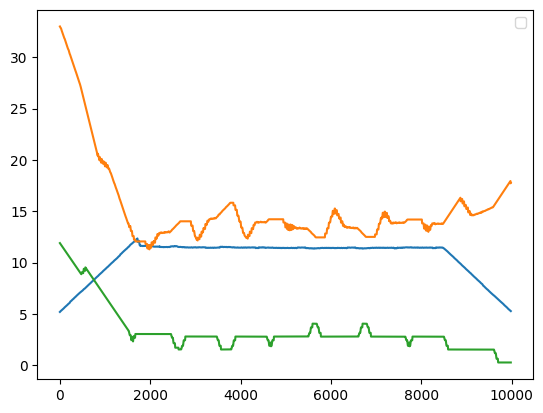

<Figure size 1600x900 with 0 Axes>

In [28]:
plt.plot(simple_moving_average(df['t_0'].to_list(),3000), label='t_0')
plt.plot(simple_moving_average(df['t_1'].to_list(),3000), label='t_1')
plt.plot(simple_moving_average(df['t_2'].to_list(),3000), label='t_2')
plt.figure(figsize=(16,9))
plt.show()